STP494 FINAL GROUP FROJECT

GROUP: ZHENGHONG CHEN, JUSTIN FINK, DEVON HAYCOCK

Our final project is pulled from our midterm project in r-markdown, with a further exploration. 
The data we are pulling comes from the csv files below found in https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

All figures shown, besides the stacked bar plot and the cluster plot, will be color cordinated to that specific state. 

Arizona will always be red
New York will always be blue
Iowa will always be green

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data2013 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2013.csv')
data2014 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2014.csv')
data2015 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2015.csv')
data2016 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2016.csv')
data2017 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2017.csv')
data2018 = pd.read_csv('Downloads/daily_aqi_by_cbsa_2018.csv')

In [5]:
totaldata = pd.concat([data2013, data2014, data2015, data2016, data2017, data2018], axis=0)

In [6]:
AZdata = totaldata[totaldata['CBSA'] == "Phoenix-Mesa-Scottsdale, AZ"]
IAdata = totaldata[totaldata['CBSA'] == "Iowa City, IA"]
NYdata = totaldata[totaldata['CBSA'] == "New York-Newark-Jersey City, NY-NJ-PA"]

SCATTER PLOTS

<function matplotlib.pyplot.show(*args, **kw)>

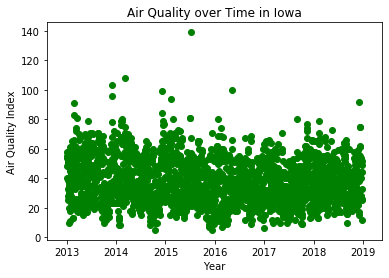

In [7]:
#pd.to_datetime(AZdata.Date, format='%mm/%dd/%YY')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
datesIA = [pd.to_datetime(date) for date in IAdata['Date']]
plt.scatter(datesIA, IAdata['AQI'], color = 'g')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in Iowa")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

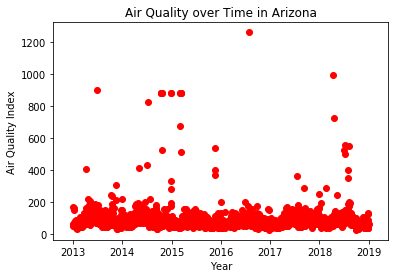

In [8]:
datesAZ = [pd.to_datetime(date) for date in AZdata['Date']]
plt.scatter(datesAZ, AZdata['AQI'], color = 'r')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in Arizona")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

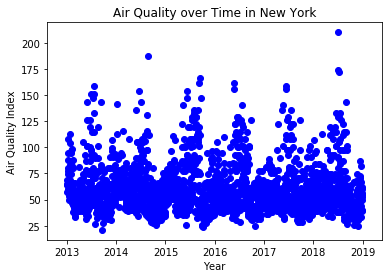

In [9]:
datesNY = [pd.to_datetime(date) for date in NYdata['Date']]
plt.scatter(datesNY, NYdata['AQI'], color ='b')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in New York")
plt.show

A total scatter plot comparison between Arizona, New York, and Iowa

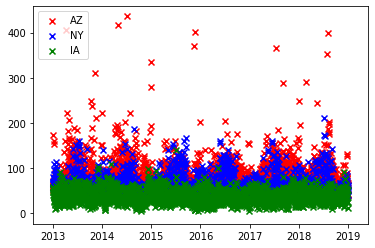

In [10]:
datesAZnew = [pd.to_datetime(date) for date in AZdata['Date'][AZdata['AQI']<500]]
plt.scatter(datesAZnew, AZdata['AQI'][AZdata['AQI']<500], c='r', marker='x', label = 'AZ')
plt.scatter(datesNY, NYdata['AQI'], c='b', marker='x', label = 'NY')
plt.scatter(datesIA, IAdata['AQI'], c='g', marker='x', label = 'IA')
plt.legend(loc='upper left')
plt.show()

HISTOGRAMS

(array([ 751., 1041.,  281.,   62.,   14.,    4.,    4.,    2.,    2.,
           5.]),
 array([ 27. ,  67.9, 108.8, 149.7, 190.6, 231.5, 272.4, 313.3, 354.2,
        395.1, 436. ]),
 <a list of 10 Patch objects>)

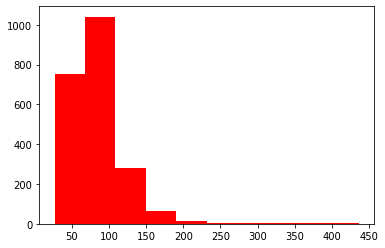

In [11]:
plt.hist(AZdata['AQI'][AZdata['AQI']<500], color ='r')

(array([2.90e+02, 1.03e+03, 5.14e+02, 1.71e+02, 1.10e+02, 4.50e+01,
        1.80e+01, 1.00e+01, 2.00e+00, 1.00e+00]),
 array([ 21. ,  39.9,  58.8,  77.7,  96.6, 115.5, 134.4, 153.3, 172.2,
        191.1, 210. ]),
 <a list of 10 Patch objects>)

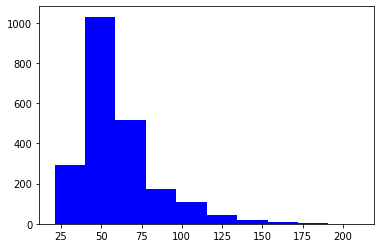

In [12]:
plt.hist(NYdata['AQI'], color ='b')

Text(0.5, 0, '')

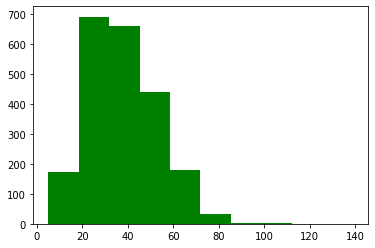

In [13]:
plt.hist(IAdata['AQI'], color ='g')
plt.xlabel("")

A total bar plot comparison between Arizona, New York, and Iowa

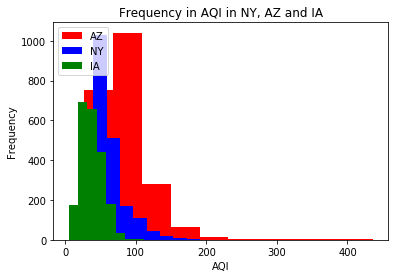

In [14]:
plt.hist(AZdata['AQI'][AZdata['AQI']<500], color = 'r', label = 'AZ')
plt.hist(NYdata['AQI'], color = 'b', label = 'NY')
plt.hist(IAdata['AQI'], color = 'g', label = 'IA')
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("Frequency in AQI in NY, AZ and IA")
plt.legend(loc='upper left')
plt.show()

LINE PLOTS

<function matplotlib.pyplot.show(*args, **kw)>

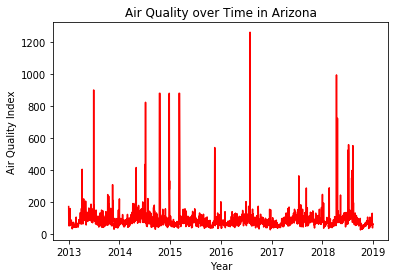

In [15]:
datesAZ = [pd.to_datetime(date) for date in AZdata['Date']]
plt.plot(datesAZ, AZdata['AQI'], color ='r')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in Arizona")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

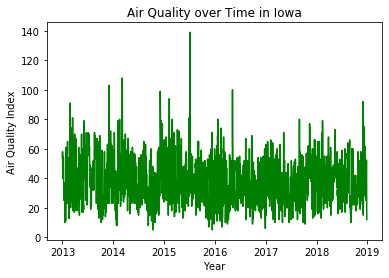

In [16]:
datesIA = [pd.to_datetime(date) for date in IAdata['Date']]
plt.plot(datesIA, IAdata['AQI'], color ='g')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in Iowa")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

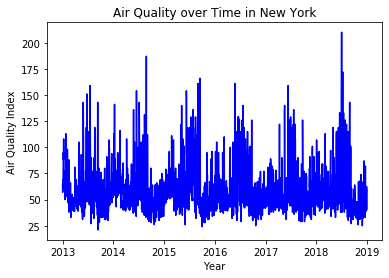

In [17]:
datesNY = [pd.to_datetime(date) for date in NYdata['Date']]
plt.plot(datesNY, NYdata['AQI'], color ='b')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in New York")
plt.show

A total Line plot comparison between Arizona, New York, and Iowa

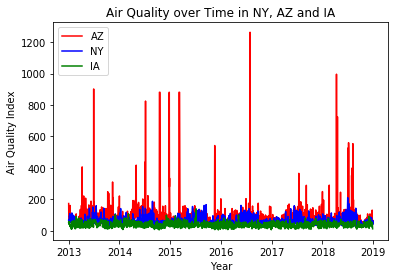

In [18]:
plt.plot(datesAZ, AZdata['AQI'], 'r', label = 'AZ')
plt.plot(datesNY, NYdata['AQI'], 'b', label = 'NY')
plt.plot(datesIA, IAdata['AQI'], 'g', label = 'IA')
plt.xlabel("Year")
plt.ylabel("Air Quality Index")
plt.title("Air Quality over Time in NY, AZ and IA")
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(loc='upper left')
plt.show()

We wanted to take a further look into the several defining parameters in order to find out a reason that could lead to the differences in AQI.

These parameters are NO2, OZONE, PM10, PM2.5, SO2

In [19]:
np.unique(NYdata['Defining Parameter'])

array(['NO2', 'Ozone', 'PM10', 'PM2.5', 'SO2'], dtype=object)

In [20]:
np.mean(IAdata['AQI'][IAdata['Defining Parameter'] == 'SO2'])

nan

Our first aproach was using a Stacked-Bar graph to compare the parameters in each state

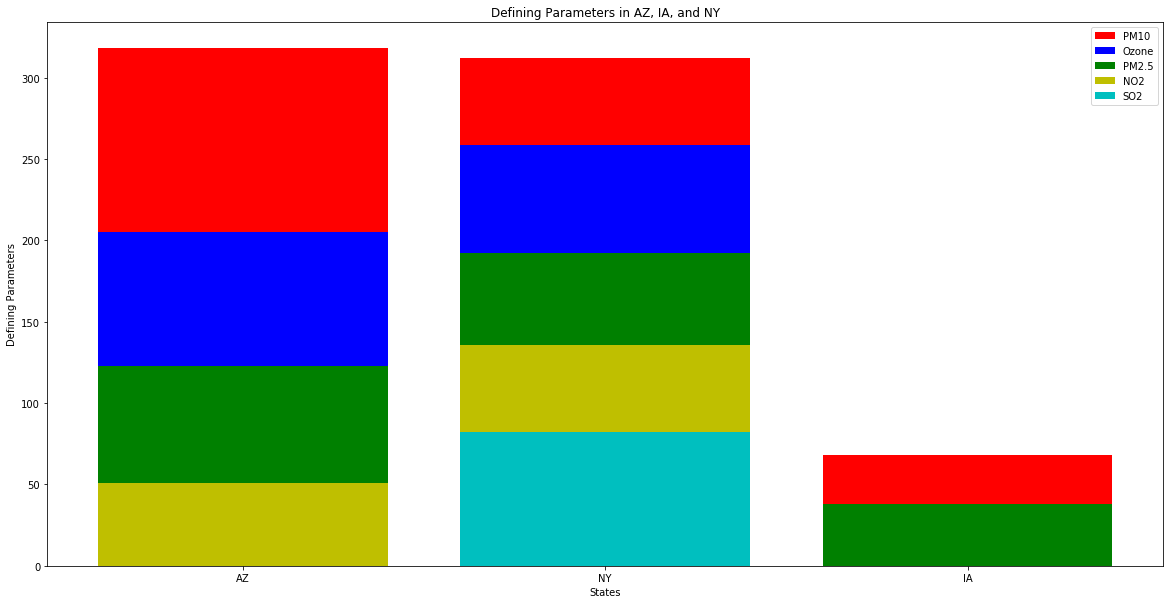

In [21]:
States = ['AZ', 'NY', 'IA',]
NO2 = np.array([50.682539682539684, 53.045307443365694, 0])
Ozone = np.array([82.04941482444734, 66.8929889298893, 0])
PM10 = np.array([113.27471383975026, 53, 30.058823529411764])
PM25 = np.array([72.15577889447236, 56.405253283302066, 38.04426002766252])
SO2 = np.array([0, 82.5, 0])
ind = [x for x, _ in enumerate(States)]

plt.bar(ind, PM10, width=0.8, label='PM10', color='r', bottom=Ozone+PM25+NO2+SO2)
plt.bar(ind, Ozone, width=0.8, label='Ozone', color='b', bottom=PM25+NO2+SO2)
plt.bar(ind, PM25, width=0.8, label='PM2.5', color='g',bottom =NO2+SO2)
plt.bar(ind, NO2, width=0.8, label='NO2', color='y',bottom =SO2)
plt.bar(ind, SO2, width=0.8, label='SO2', color='c')

plt.xticks(ind, States)
plt.ylabel("Defining Parameters")
plt.xlabel("States")
plt.legend(loc="upper right")
plt.title("Defining Parameters in AZ, IA, and NY")

plt.show()

Our second aproach was to compare the each states parameters to each other

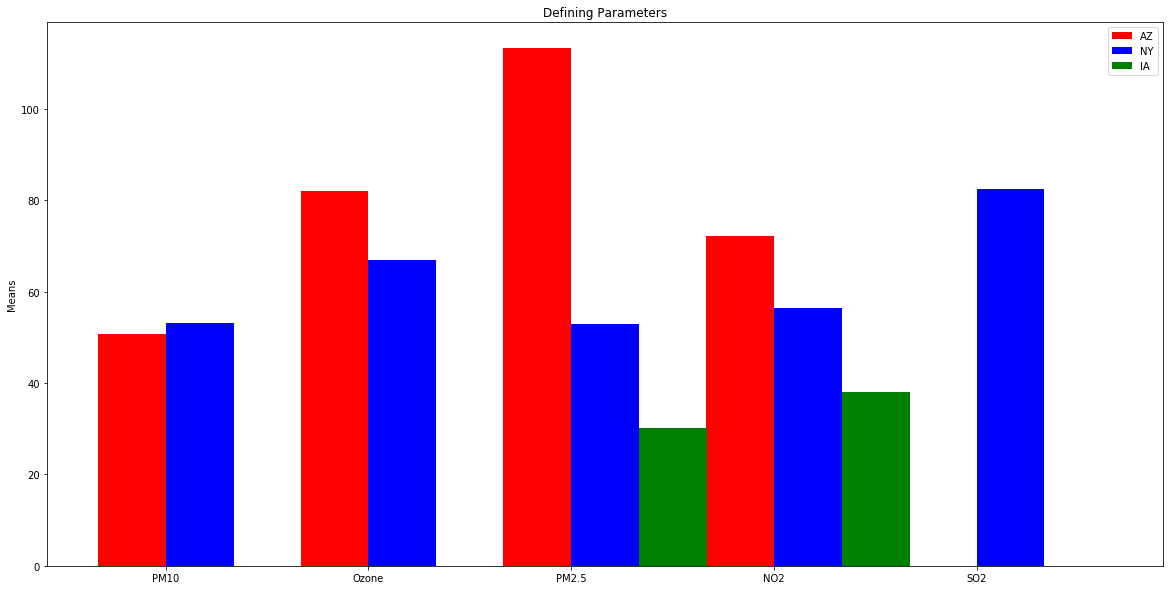

In [22]:
N = 5
AZ_means = (50.682539682539684, 82.04941482444734, 113.27471383975026, 72.15577889447236, 0)
NY_means = (53.045307443365694, 66.8929889298893, 53, 56.405253283302066, 82.5)
IA_means = (0, 0, 30.058823529411764, 38.04426002766252, 0)

ind = np.arange(N) 
width = 0.335       
plt.bar(ind, AZ_means, width, label='AZ', color = 'r')
plt.bar(ind + width, NY_means, width, label='NY', color = 'b')
plt.bar(ind + width + width, IA_means, width, label='IA', color = 'g')

plt.ylabel('Means')
plt.title('Defining Parameters')

plt.xticks(ind + width / 2, ('PM10', 'Ozone', 'PM2.5', 'NO2', 'SO2'))
plt.legend(loc='best')
plt.show()

CLUSTERING

In [ ]:
totaldates = [pd.to_datetime(date) for date in totaldata['Date'][totaldata['AQI']<500]]
totaltsdata= totaldata[totaldata['AQI']<500]
totaltsdata['Date']=totaldates
plt.scatter(totaltsdata['Date'][totaltsdata['Defining Parameter']=='SO2'], totaltsdata['AQI'][totaltsdata['Defining Parameter'] == 'SO2'], color='c', label = 'SO2' )
plt.scatter(totaltsdata['Date'][totaltsdata['Defining Parameter']=='PM2.5'], totaltsdata['AQI'][totaltsdata['Defining Parameter'] == 'PM2.5'], color='g', label = 'PM2.5' )
plt.scatter(totaltsdata['Date'][totaltsdata['Defining Parameter']=='PM10'], totaltsdata['AQI'][totaltsdata['Defining Parameter'] == 'PM10'], color='r', label = 'PM10' )
plt.scatter(totaltsdata['Date'][totaltsdata['Defining Parameter']=='Ozone'], totaltsdata['AQI'][totaltsdata['Defining Parameter'] == 'Ozone'], color='b', label = 'Ozone' )
plt.scatter(totaltsdata['Date'][totaltsdata['Defining Parameter']=='NO2'], totaltsdata['AQI'][totaltsdata['Defining Parameter'] == 'NO2'], color='y', label = 'NO2' )


plt.xlabel('Year')
plt.ylabel('Air Quality')
plt.rcParams["figure.figsize"] = (20,10)
plt.title('NY Air Quality Data Clustered by Defining Parameter')
plt.legend(loc='upper left')
plt.show()

In [261]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit([totaldatareg5['NO2'],totaldatareg5['PM10'], totaldatareg5['PM2.5'], totaldatareg5['Ozone'], totaldatreg5['SO2']], totaldatareg5['AQI'])

# display coefficients
print(regressor.coef_)
regressor.summary()

ValueError: could not convert string to float: 'PM2.5'

In [323]:
firstcat = pd.DataFrame(np.zeros((178193), dtype=int).T)

In [331]:
totaldatareg = pd.concat([firstcat, totaldata], axis=0)

In [333]:
totaldatareg['0'] = 0

In [344]:
for entry in totaldatareg['Defining Parameter']:
    if entry=='NO2':
        totaldatareg['0'] = 1 

In [346]:
totaldatareg[totaldatareg['0']==1].tail(5)

,0,AQI,CBSA,CBSA Code,Category,Date,Defining Parameter,Defining Site,Number of Sites Reporting,0
178189,NaN,36.0,"Yuma, AZ",49740.0,Good,12/27/18,PM10,04-027-8011,1.0,1
178190,NaN,27.0,"Yuma, AZ",49740.0,Good,12/28/18,PM10,04-027-8011,1.0,1
178191,NaN,36.0,"Yuma, AZ",49740.0,Good,12/29/18,PM10,04-027-8011,1.0,1
178192,NaN,20.0,"Yuma, AZ",49740.0,Good,12/30/18,PM2.5,04-027-8011,1.0,1
178193,NaN,34.0,"Yuma, AZ",49740.0,Good,12/31/18,PM2.5,04-027-8011,1.0,1


In [28]:
firstcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
firstcat.columns = ['NO2']
totaldatareg1 = pd.concat([firstcat, totaldata], axis=0)
totaldatareg1['NO2'] = 0

for entry in totaldatareg1['Defining Parameter']:
    if entry=='NO2':
        totaldatareg1['NO2'] = 1 

C:\Users\darks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
secondcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
totaldatareg2 = pd.concat([secondcat, totaldatareg1], axis=0)
totaldatareg2['0'] = 0

for entry in totaldatareg2['Defining Parameter']:
    if entry=='PM10':
        totaldatareg2['0'] = 1 

In [ ]:
thirdcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
totaldatareg3 = pd.concat([thirdcat, totaldatareg2], axis=0)
totaldatareg3['0'] = 0

for entry in totaldatareg3['Defining Parameter']:
    if entry=='PM2.5':
        totaldatareg3['0'] = 1 

In [ ]:
fourthcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
totaldatareg4 = pd.concat([fourthcat, totaldatareg3], axis=0)
totaldatareg4['0'] = 0

for entry in totaldatareg4['Defining Parameter']:
    if entry=='Ozone':
        totaldatareg4['0'] = 1 

In [ ]:
fifthcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
totaldatareg5 = pd.concat([fifthcat, totaldatareg4], axis=0)
totaldatareg5['0'] = 0

for entry in totaldatareg5['Defining Parameter']:
    if entry=='SO2':
        totaldatareg5['0'] = 1 

In [278]:
firstcat = pd.DataFrame(np.zeros((178193), dtype=int).T)
firstcat.columns = ['NO2']
totaldatareg1 = pd.concat([firstcat, totaldata], axis=0)
totaldatareg1['NO2'] = 0

for entry in totaldatareg1['Defining Parameter']:
    if entry=='NO2':
        totaldatareg1['NO2'] = 1 

NameError: name 'dim' is not defined

In [287]:
totaldata.tail(5)

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
178189,"Yuma, AZ",49740,12/27/18,36,Good,PM10,04-027-8011,1
178190,"Yuma, AZ",49740,12/28/18,27,Good,PM10,04-027-8011,1
178191,"Yuma, AZ",49740,12/29/18,36,Good,PM10,04-027-8011,1
178192,"Yuma, AZ",49740,12/30/18,20,Good,PM2.5,04-027-8011,1
178193,"Yuma, AZ",49740,12/31/18,34,Good,PM2.5,04-027-8011,1
